# Importing Modules
importing different modules used in this project for Data Analysis and Prediction 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Wisconsin Dataset

In [2]:
names=["ID","Clump_Thickness","Uniform_cell_size","Uniform_cell_shape","Marginal_Adhesion","Single_epithelial_cell_size",
      "Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]
df=pd.read_csv("D:/Study/Datasets/Breast Cancer/breast-cancer-wisconsin.data",names=names)
df.head()

,ID,Clump_Thickness,Uniform_cell_size,Uniform_cell_shape,Marginal_Adhesion,Single_epithelial_cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Class: (2 for benign, 4 for malignant)

# Pre-process of dataset

In [4]:
#df.replace('?',5,inplace=True)
#print(df.axes)

# Data Insight
Exploring Data for more information

In [5]:
print("Total Number of Rows in Dataset:",df.shape[0])
print("Total Number of Columns in Dataset:",df.shape[1])

Total Number of Rows in Dataset: 699
Total Number of Columns in Dataset: 11


In [6]:
for i,col in enumerate(df.columns):
    print(i+1,"Column is ",col)

1 Column is  ID
2 Column is  Clump_Thickness
3 Column is  Uniform_cell_size
4 Column is  Uniform_cell_shape
5 Column is  Marginal_Adhesion
6 Column is  Single_epithelial_cell_size
7 Column is  Bare_Nuclei
8 Column is  Bland_Chromatin
9 Column is  Normal_Nucleoli
10 Column is  Mitoses
11 Column is  Class


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
Clump_Thickness                699 non-null int64
Uniform_cell_size              699 non-null int64
Uniform_cell_shape             699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_epithelial_cell_size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
df.describe()

,ID,Clump_Thickness,Uniform_cell_size,Uniform_cell_shape,Marginal_Adhesion,Single_epithelial_cell_size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Data Visualization

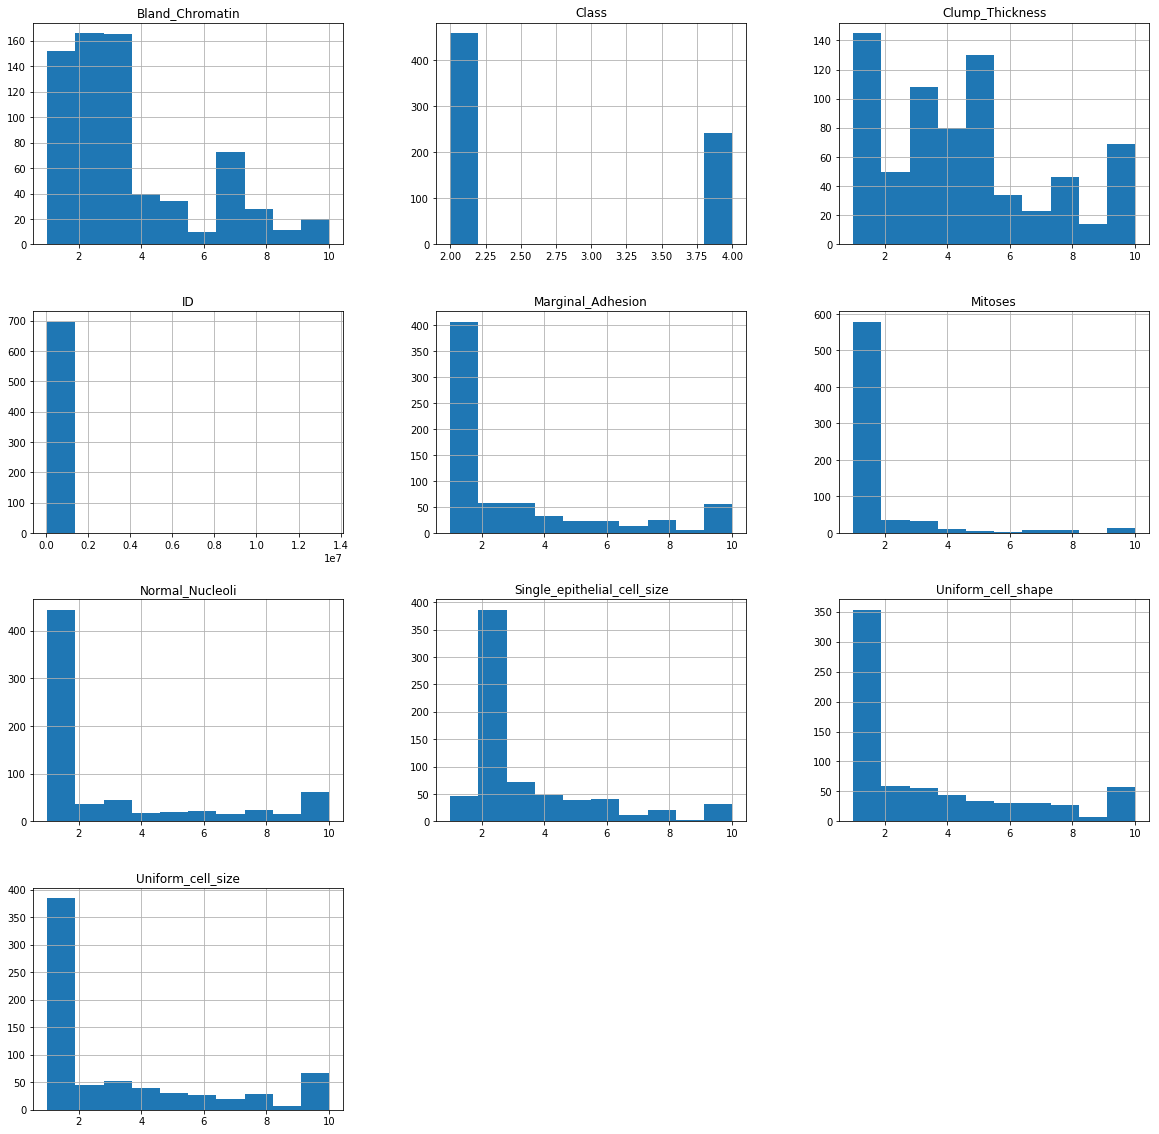

In [9]:
# Histograms

df.hist(figsize=(20,20))
plt.show()

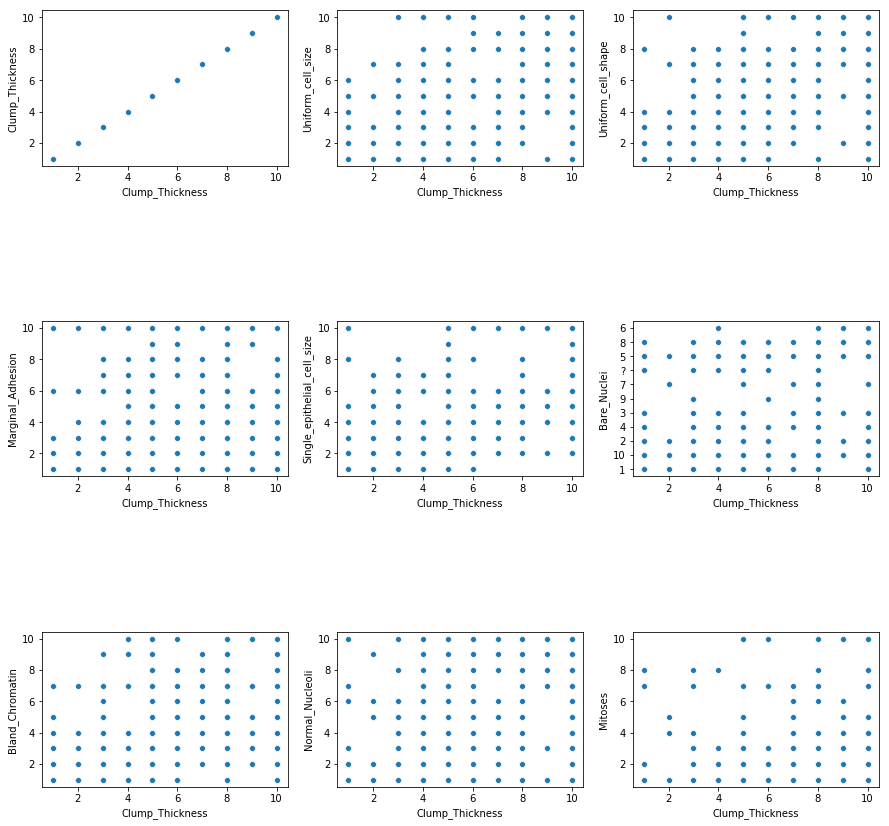

In [10]:
# Scatter plot Clump Thickness vs other Parameter
fig=plt.subplots(figsize=(15,20))
features=['Clump_Thickness', 'Uniform_cell_size', 'Uniform_cell_shape', 'Marginal_Adhesion', 'Single_epithelial_cell_size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
for i,j in enumerate(features):
    plt.subplots_adjust(hspace = 1.0)
    plt.subplot(4, 3, i+1)
    sns.scatterplot("Clump_Thickness",y=j,data=df)

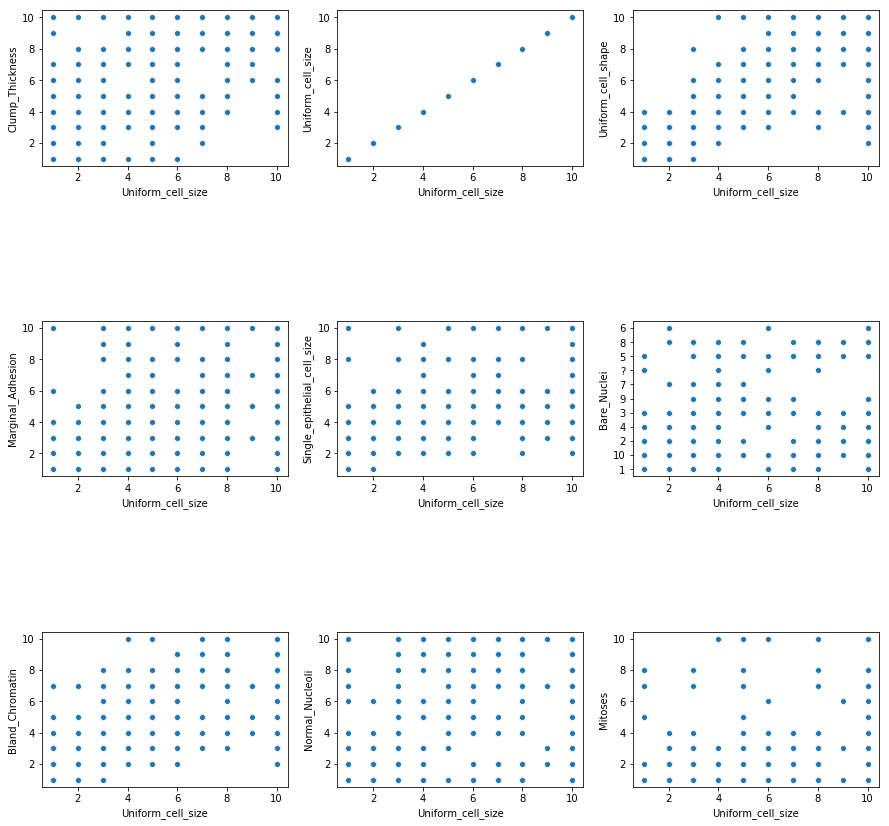

In [11]:
# Scatter plot Cell_Size vs other Parameter
fig=plt.subplots(figsize=(15,20))
features=['Clump_Thickness', 'Uniform_cell_size', 'Uniform_cell_shape', 'Marginal_Adhesion', 'Single_epithelial_cell_size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
for i,j in enumerate(features):
    plt.subplots_adjust(hspace = 1.0)
    plt.subplot(4, 3, i+1)
    sns.scatterplot("Uniform_cell_size",y=j,data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF5F8939E8>,
      dtype=object)

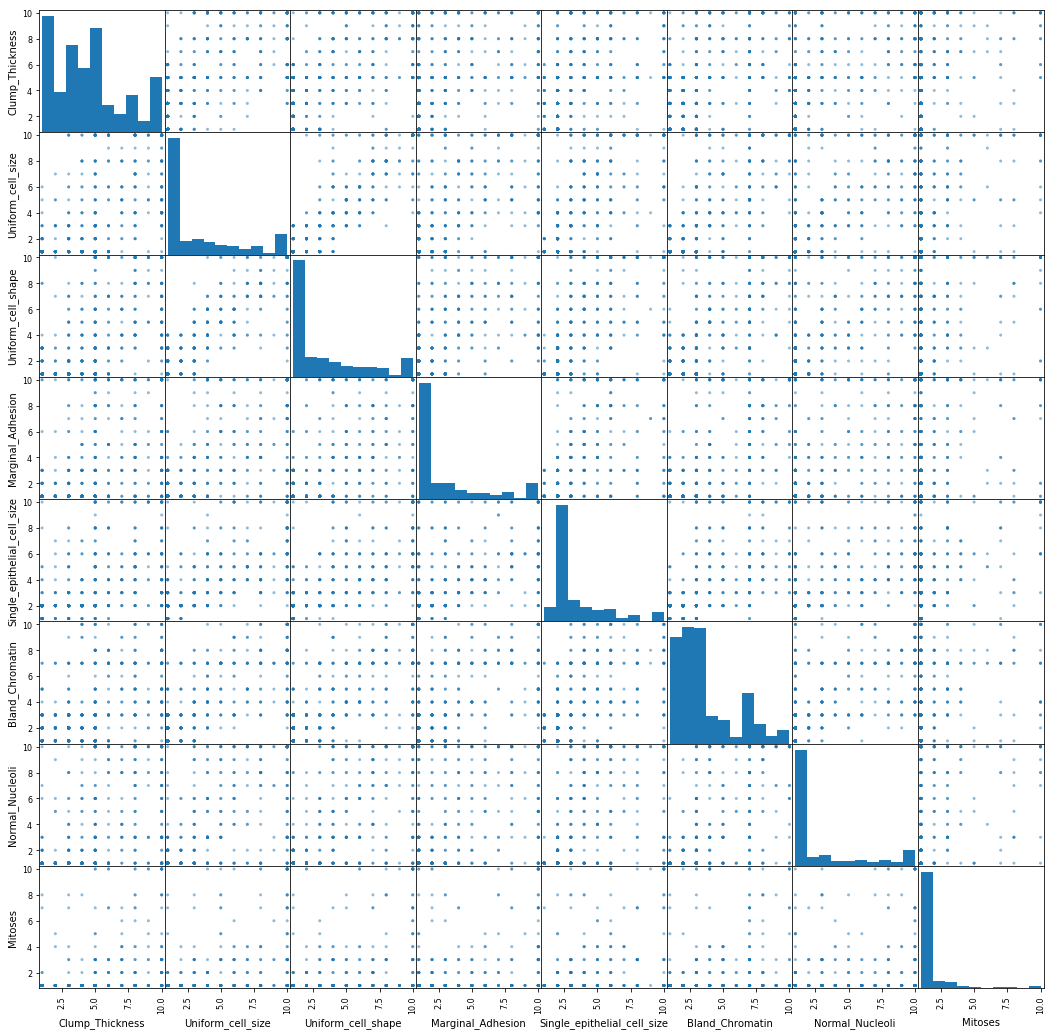

In [12]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
df1=df[features]
scatter_matrix(df1,figsize=(18,18))

# Building Prediction Model


In [13]:
# Data Preprocessing for developing model
df.replace('?',-99999,inplace=True)
df.drop(['ID'],axis=1,inplace=True)

In [14]:
#Creating x and y dataset for training

X=np.array(df.drop(['Class'],1))
Y=np.array(df['Class'])

In [15]:
#finding Correlation between parametrs 
corr=df.corr(method ='pearson') 
corr

,Clump_Thickness,Uniform_cell_size,Uniform_cell_shape,Marginal_Adhesion,Single_epithelial_cell_size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


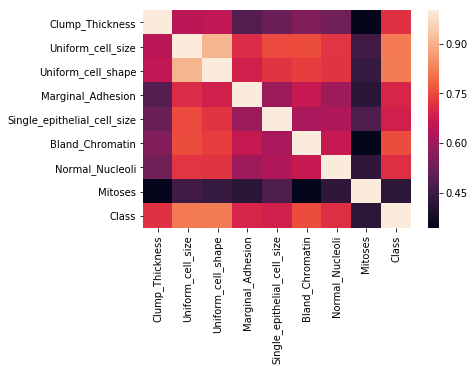

In [16]:
# Correlation Heatmap Using seaborn library
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)



# Developing Model

In [17]:
# Splitting Data In Training Set and Test Set 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.05,random_state = 0)
Y_train=Y_train.astype('int')

In [18]:

#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Logistic Regression

In [19]:
# Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
# Prediction
Y_pred = classifier.predict(X_test)

In [21]:
# Confusion Matrix For Evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[20  2]
 [ 0 13]]


In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Accuracy: 0.9428571428571428


# KNN : K-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [24]:
# Prediction
Y_pred2 = classifier2.predict(X_test)


In [25]:
# Confusion Matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred2)
print(confusion_matrix)

[[21  1]
 [ 0 13]]


In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred2))


Accuracy: 0.9714285714285714
